In [0]:
import warnings
warnings.filterwarnings(action='ignore')

In [0]:
import os
import sys
import os.path as Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# Reproducibility
seed = 18
np.random.seed(seed)

In [0]:
# mount gdrive and unzip data
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  project_dir = '/content/gdrive/My Drive/Colab_projects/PersonAttribures'
except:
  project_dir = '..'
print(Path.abspath(project_dir))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab_projects/PersonAttribures


In [0]:
if Path.exists(project_dir):
    # os.chdir(Path.join(project_dir)) 
    data_dir = Path.join(project_dir,'data')
    url = Path.join(data_dir,'interim','colab_preprocessed_data.csv')

In [0]:
os.getcwd()

'/content'

In [0]:
try:
    df = pd.read_csv(url)
except:
    print('File not found')
    raise
df.head(2)

,image_path,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,age_55+,weight_normal-healthy,weight_over-weight,weight_slightly-overweight,weight_underweight,carryingbag_Daily/Office/Work Bag,carryingbag_Grocery/Home/Plastic Bag,carryingbag_None,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,/content/gdrive/My Drive/Colab_projects/Person...,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,/content/gdrive/My Drive/Colab_projects/Person...,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [0]:
df = df[:500]
df.shape

(500, 28)

In [0]:
df.shape

(500, 28)

In [0]:
# from IPython.display import Image
# Image(df.image_path[0])
Path.isfile(df.image_path[0])

False

In [0]:
src_dir = Path.join(project_dir, 'src')
data_scripts_dir = Path.join(src_dir, 'data_scripts')

In [0]:
Path.abspath(src_dir)

'/content/gdrive/My Drive/Colab_projects/PersonAttribures/src'

In [0]:
import sys  
sys.path.insert(0, Path.abspath(src_dir))

In [0]:
# drive.mount("/content/gdrive", force_remount=True)
%tensorflow_version 1.x 

In [0]:
from data_scripts.custom_data_gen_colab import PersonDataGenerator

Using TensorFlow backend.


In [0]:
from data_scripts.aug_functions import blur_cutout, get_random_eraser

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
train_df, val_df = train_test_split(df, test_size=0.15, random_state=18)


In [0]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.15, random_state=18)
train_df.shape, val_df.shape

((425, 28), (75, 28))

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images are rescaled during batch generation
orig = ImageDataGenerator(rescale=1/255.0)
# train_aug1 = ImageDataGenerator(rescale=1/255.0,preprocessing_function=blur_cutout)
train_aug2 = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)
train_aug3 = ImageDataGenerator(rescale=1/255.0,brightness_range=[0.2,0.8])
# train_aug4 = ImageDataGenerator(rescale=1/255.0,channel_shift_range=100)
train_aug5 = ImageDataGenerator(rescale=1/255.0,preprocessing_function=get_random_eraser)

val_aug = ImageDataGenerator(rescale=1/255.0)

In [0]:
train_gen = PersonDataGenerator(
    train_df, 
    batch_size=8, #32, 
    aug_list=[orig, train_aug2, train_aug4, train_aug5],
    # aug_list=[orig, train_aug1, train_aug2, train_aug3, train_aug4, train_aug5],
    incl_orig=False)

valid_gen = PersonDataGenerator(
    val_df, 
    batch_size=8, #32, 
    aug_list=[val_aug],
    incl_orig=False)



In [0]:
# get number of output units from data
images, targets = next(iter(train_gen))
num_units = { k.split("_output")[0]:v.shape[1] for k, v in targets.items()}
num_units

{'age': 5,
 'bag': 3,
 'emotion': 4,
 'footwear': 3,
 'gender': 2,
 'image_quality': 3,
 'pose': 3,
 'weight': 4}

In [0]:
val_images, val_targets = next(iter(valid_gen))
val_num_units = { k.split("_output")[0]:v.shape[1] for k, v in targets.items()}
val_num_units

{'age': 5,
 'bag': 3,
 'emotion': 4,
 'footwear': 3,
 'gender': 2,
 'image_quality': 3,
 'pose': 3,
 'weight': 4}

In [0]:
try:
    from google.colab.patches import cv2_imshow
except:
    import cv2
    def cv2_imshow(image):
        cv2.imshow("test", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

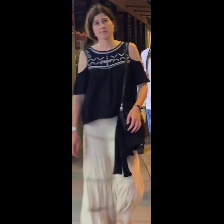

In [0]:
cv2_imshow(images[0])

In [0]:
images[0].shape

(224, 224, 3)

In [0]:
len(images)

8

In [0]:
from models.custom_model_builder import get_custom_model

In [0]:
model = get_custom_model(input_shape=(224, 224, 3))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
from keras.optimizers import SGD
losses = {
    "gender_output": "binary_crossentropy",
    "image_quality_output": "categorical_crossentropy",
    "age_output": "categorical_crossentropy",
    "weight_output": "categorical_crossentropy",
    "bag_output": "categorical_crossentropy",
    "footwear_output": "categorical_crossentropy", 
    "pose_output": "categorical_crossentropy", 
    "emotion_output": "categorical_crossentropy"
} 

loss_weights = {
    "gender_output": 1.0,
    "image_quality_output": 1.0,
    "age_output": 1.0,
    "weight_output": 1.0,
    "bag_output": 1.0,
    "footwear_output": 1.0, 
    "pose_output": 1.0, 
    "emotion_output": 1.0
} 

opt = SGD(lr=0.001, momentum=0.9)

model.compile(
    optimizer = opt,
    loss = losses, 
    loss_weights = loss_weights, 
    metrics=["accuracy"]
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model_info = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    use_multiprocessing=True,
    workers=6, 
    epochs=5,
    verbose=1
)

Epoch 1/5
212/212 [==============================] - 66s 311ms/step - loss: 8.0586 - gender_output_loss: 0.7125 - image_quality_output_loss: 0.9437 - age_output_loss: 1.4888 - weight_output_loss: 0.9835 - bag_output_loss: 1.0350 - footwear_output_loss: 1.1057 - pose_output_loss: 0.9322 - emotion_output_loss: 0.8321 - gender_output_acc: 0.5643 - image_quality_output_acc: 0.5537 - age_output_acc: 0.3803 - weight_output_acc: 0.6291 - bag_output_acc: 0.4959 - footwear_output_acc: 0.4363 - pose_output_acc: 0.6350 - emotion_output_acc: 0.7600 - val_loss: 16.5805 - val_gender_output_loss: 1.3605 - val_image_quality_output_loss: 1.6013 - val_age_output_loss: 2.8852 - val_weight_output_loss: 1.5644 - val_bag_output_loss: 1.8186 - val_footwear_output_loss: 2.3176 - val_pose_output_loss: 2.4596 - val_emotion_output_loss: 2.5482 - val_gender_output_acc: 0.5972 - val_image_quality_output_acc: 0.5833 - val_age_output_acc: 0.3333 - val_weight_output_acc: 0.6667 - val_bag_output_acc: 0.5556 - val_foot

In [0]:
labels = [key for key, _ in targets.items()]
labels

['gender_output',
 'image_quality_output',
 'age_output',
 'weight_output',
 'bag_output',
 'pose_output',
 'footwear_output',
 'emotion_output']

In [0]:
from visualization_scripts.plot_model_history import plot_cumulative, plot_feature_history

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

In [0]:
project_dir


'/content/gdrive/My Drive/Colab_projects/PersonAttribures'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
def lr_schedule(epoch):
  lr = round(0.003 * pow(0.5, epoch//5), 10) #  halving lr every 5 epochs
  print ('Learning rate is : ', lr)
  return lr

# Prepare model model saving directory.
save_dir = Path.join(project_dir, 'models', 'saved_models')
model_name = 'train_1_model.{epoch:03d}.h5'
if not Path.isdir(save_dir):
    os.makedirs(save_dir, exist_ok=True)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)


lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

In [0]:
model_info = model.fit_generator(
    generator=train_gen,
    validation_data=valid_gen,
    use_multiprocessing=True,
    workers=6, 
    epochs=30,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/30
Learning rate is :  0.003
212/212 [==============================] - 64s 300ms/step - loss: 7.2636 - gender_output_loss: 0.6337 - image_quality_output_loss: 0.8014 - age_output_loss: 1.3630 - weight_output_loss: 0.9153 - bag_output_loss: 0.9438 - footwear_output_loss: 0.9771 - pose_output_loss: 0.8601 - emotion_output_loss: 0.7444 - gender_output_acc: 0.6474 - image_quality_output_acc: 0.6274 - age_output_acc: 0.4175 - weight_output_acc: 0.6362 - bag_output_acc: 0.5430 - footwear_output_acc: 0.4971 - pose_output_acc: 0.6392 - emotion_output_acc: 0.7689 - val_loss: 16.3844 - val_gender_output_loss: 1.7435 - val_image_quality_output_loss: 2.2454 - val_age_output_loss: 2.4986 - val_weight_output_loss: 1.4230 - val_bag_output_loss: 1.7632 - val_footwear_output_loss: 2.1905 - val_pose_output_loss: 2.1893 - val_emotion_output_loss: 2.3061 - val_gender_output_acc: 0.3750 - val_image_quality_output_acc: 0.5000 - val_age_output_acc: 0.3611 - val_weight_output_acc: 0.6667 - val_bag_ou

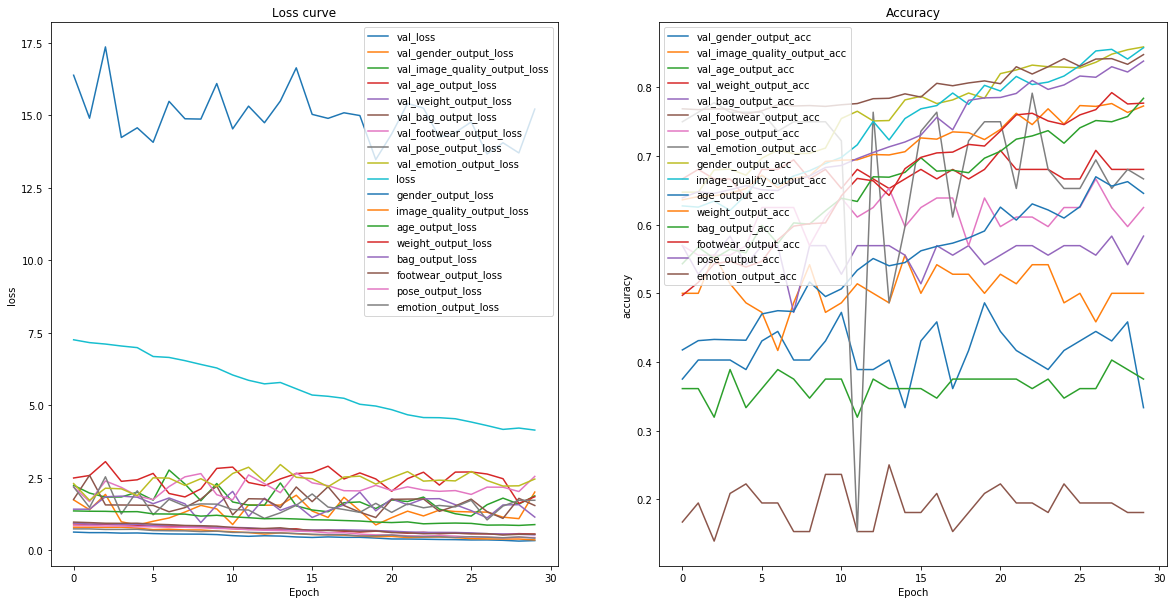

In [0]:
plot_cumulative(model_info)

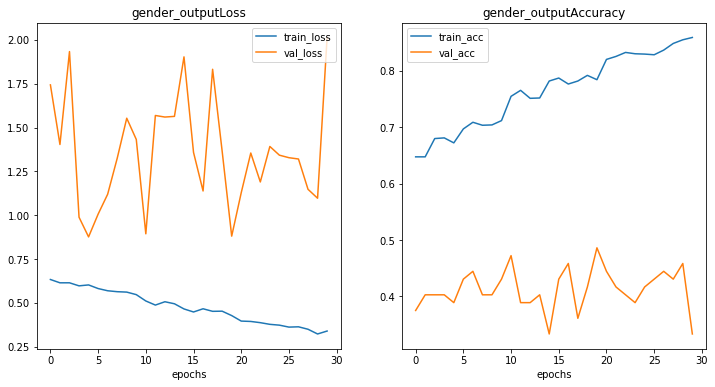

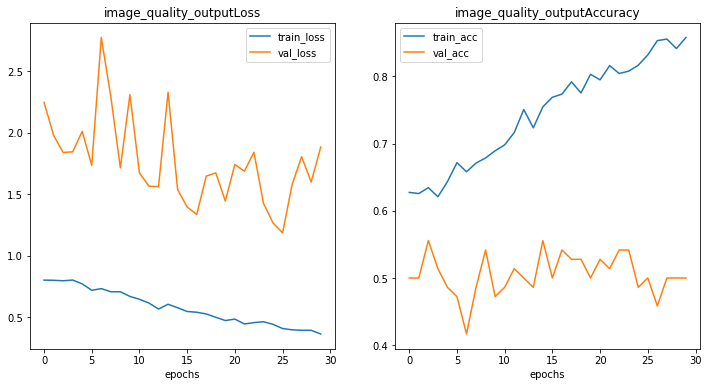

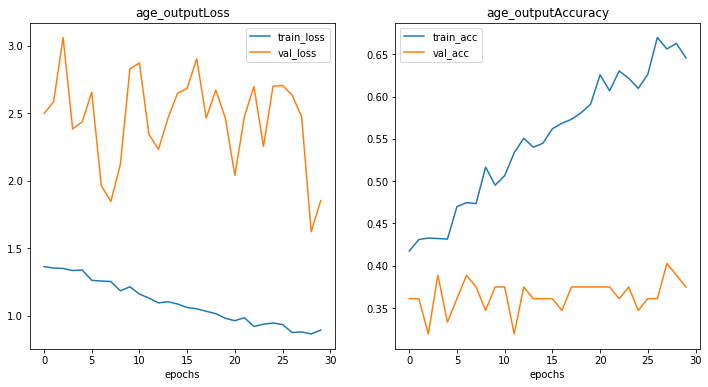

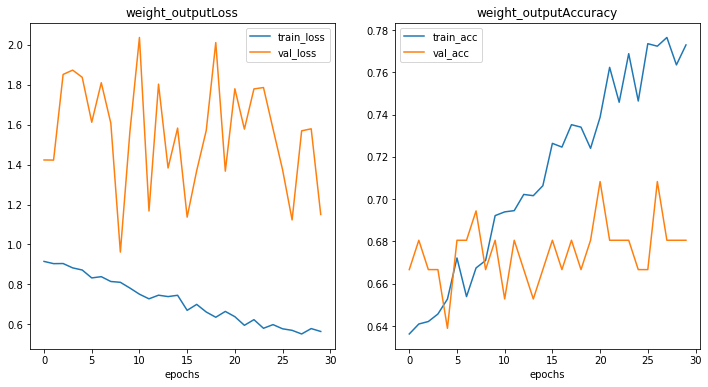

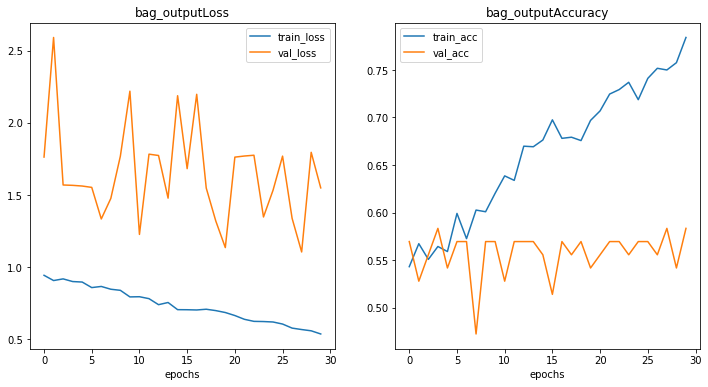

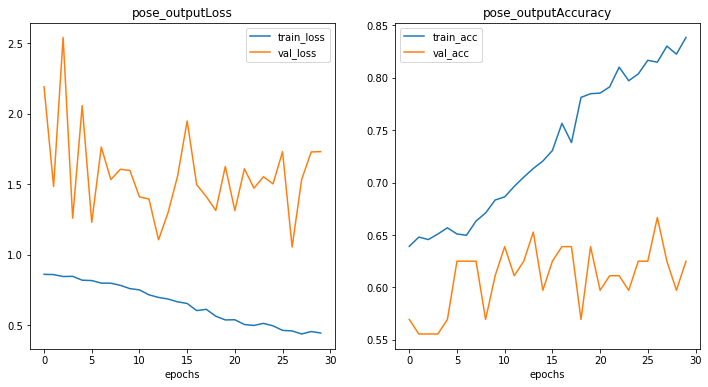

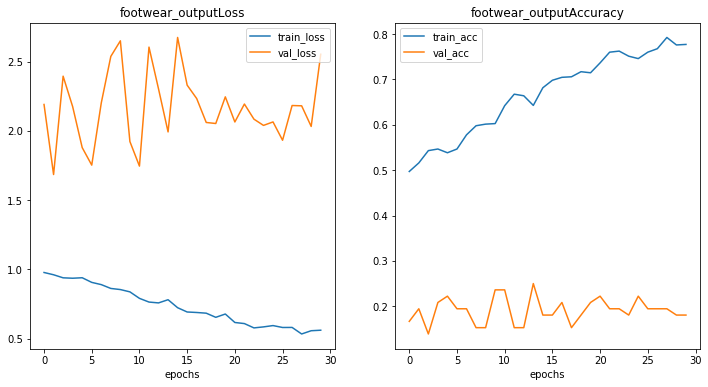

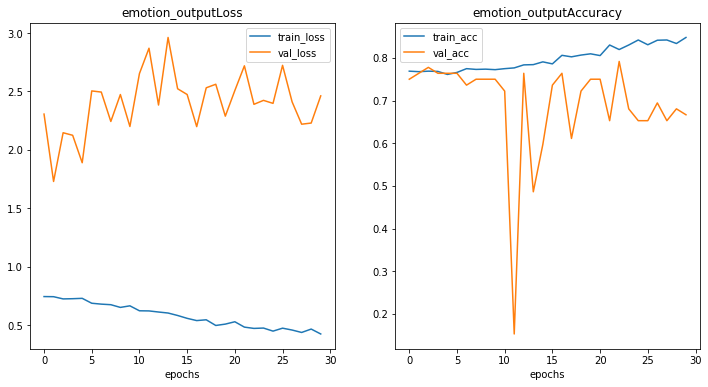

In [0]:
for label in labels:
    plot_feature_history(model_info, label)

In [0]:
results = model.evaluate_generator(valid_gen, verbose=1)
dict(zip(model.metrics_names, results))

9/9 [==============================] - 1s 97ms/step


{'age_output_acc': 0.375,
 'age_output_loss': 2.9055233928892346,
 'bag_output_acc': 0.5416666666666666,
 'bag_output_loss': 1.5681410961680942,
 'emotion_output_acc': 0.625,
 'emotion_output_loss': 2.746315154764387,
 'footwear_output_acc': 0.18055555555555555,
 'footwear_output_loss': 2.306634227434794,
 'gender_output_acc': 0.4027777777777778,
 'gender_output_loss': 1.5548136432965596,
 'image_quality_output_acc': 0.4861111111111111,
 'image_quality_output_loss': 1.793238706058926,
 'loss': 16.19047869576348,
 'pose_output_acc': 0.6388888888888888,
 'pose_output_loss': 1.2747740149497986,
 'weight_output_acc': 0.6666666666666666,
 'weight_output_loss': 2.017104254828559}